# 미니 프로젝트 - 부동산 아파트 실거래 가격 수집

| 항목명(영문)    | 항목명(국문)    | 크기  | 구분 | 데이터    | 항목설명                                                                               |
| ---------- | ---------- | --- | -- | ------ | ---------------------------------------------------------------------------------- |
| serviceKey | 인증키        | 100 | 1  | 인증키    | 공공데이터포털에서 발급받은 인증키                                                                 |
| pageNo     | 페이지번호      | 4   | 0  | 1      | 페이지번호                                                                              |
| numOfRows  | 한 페이지 결과 수 | 4   | 0  | 10     | 한 페이지 결과 수                                                                         |
| LAWD_CD    | 지역코드       | 5   | 1  | 11110  | [각 지역별 코드 행정표준코드관리시스템(www.code.go.kr)의 법정동코드 10자리 중 앞 5자리](http://www.code.go.kr/) |
| DEAL_YMD   | 계약월        | 6   | 1  | 201512 | 실거래 자료의 계약년월(6자리)                                                                  |

✅ 공공 데이터 포탈 : https://www.data.go.kr/ <br>
✅ PublicDataReader : https://github.com/WooilJeong/PublicDataReader

## 패키지 설치하기 

In [1]:
# XML을 JSON으로 변환해 주는 모듈 
!pip install xmltodict

In [215]:
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
import xmltodict
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

⭐️ URL 및 Columns 지정

In [94]:
# 아파트 매매 URL 및 Columns 
url = "http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev"
columns = ['지역코드', '도로명', '법정동', '지번', '아파트', '건축년도', '층', '전용면적', '년', '월', '일', '거래금액', '도로명건물본번호코드', '도로명건물부번호코드', '도로명시군구코드', '도로명일련번호코드', '도로명지상지하코드', '도로명코드', '법정동본번코드', '법정동부번코드', '법정동시군구코드', '법정동읍면동코드', '법정동지번코드', '일련번호', '거래유형', '중개사소재지', '해제사유발생일', '해제여부']

## 데이터 저장하기 - 단일연월 데이터 조회하기 

⭐️ 파라미터 값 설정 세팅 - 단일월 조회 
1. 인증키 : default parameter
2. 조회할 행수 : defult parameter
3. 시군구 코드 : default parameter
4. 조회할 연월 : input value
    

In [95]:
# 용산구, 2021년도 3월 
service_key = 'xakMVYfbaJ5U1aXnohGLoHWai3wcg0%2B7rBZIAvNInYh0Qt9pSbh5bWSKGPvui246irliU8Tn2ckh8t1z1EOp0g%3D%3D'
sigungu_code = '11170'
year_month = '202103'

params = {
    "serviceKey": requests.utils.unquote(service_key),
    "numOfRows": "99999",
    "LAWD_CD": sigungu_code,
    "DEAL_YMD" : year_month 
}
   

⭐️ 빈 데이터 프레임 생성


In [96]:
df = pd.DataFrame(columns=columns)

⭐️ Request 보내기 및 status 확인 

In [97]:
# response 함수에 url, 딕션너리 형태 파라미터, SSL 인증을 생략하는 verify=False 입력 
response = requests.get(url, params=params, verify=False)
response.status_code

200

In [98]:
response

<Response [200]>

⭐️ xmltodict 모듈 사용해서 json형태로 변환 

In [99]:
res_json = xmltodict.parse(response.text)

⭐️ 부동산 매매 데이터 items에 저장

In [100]:
items = res_json['response']['body']["items"]
data = items['item']


In [126]:
sub = pd.DataFrame(data)

In [127]:
df = pd.concat([df,sub], axis=0, ignore_index=True)

In [129]:
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
0,11170,후암로44길,후암동,1-20,후암맨션,1974,6,72.13,2021,3,...,0001,0020,11170,10100,1,11170-3,None,None,None,None
1,11170,원효로,원효로1가,46-3,용산파크뷰(46-3),2018,15,29.67,2021,3,...,0046,0003,11170,11200,1,11170-3174,None,None,None,None
2,11170,효창원로15길,신창동,102,세방리버하이빌,2005,5,59.76,2021,3,...,0102,0000,11170,11400,1,11170-259,None,None,None,None
3,11170,새창로8길,산천동,204,한강타운,2001,14,59.69,2021,3,...,0204,0000,11170,11500,1,11170-139,None,None,None,None
4,11170,삼개로,청암동,181,GS자이,2005,5,157.43,2021,3,...,0181,0000,11170,11600,1,11170-164,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,11170,독서당로,한남동,828,한남아이파크애비뉴,2017,11,49.6243,2021,3,...,0828,0000,11170,13100,1,11170-3107,None,None,None,None
83,11170,한남대로,한남동,72-1,한남동리첸시아,2004,11,37.53,2021,3,...,0072,0001,11170,13100,1,11170-184,None,None,None,None
84,11170,독서당로,한남동,810,한남더힐,2011,8,59.686,2021,3,...,0810,0000,11170,13100,1,11170-2839,None,None,None,None
85,11170,한남대로,한남동,72-1,한남동리첸시아,2004,14,51.93,2021,3,...,0072,0001,11170,13100,1,11170-184,None,None,None,None


## 데이터 저장하기 - 연월 기간 지정 후 데이터 수집하기 

⭐️ 파라미터 값 설정 세팅 - 연월 기간 지정 후 데이터 수집하기 
1. 인증키 : default parameter
2. 조회할 행수 : defult parameter
3. 시군구 코드 : default parameter
    

In [1]:
# 연월 시점 설정 
# start_year_month : 'yyyymm' or yyyymm
# end_year_month : 'yyyymm' or yyyymm 

⭐️ 서비스키, 시군구 코드, params 값에 설정

In [38]:
# 용산구, 2022년도 5월부터 8월까지 
service_key = 'xakMVYfbaJ5U1aXnohGLoHWai3wcg0%2B7rBZIAvNInYh0Qt9pSbh5bWSKGPvui246irliU8Tn2ckh8t1z1EOp0g%3D%3D'
sigungu_code = '11170'

params = {
    "serviceKey": requests.utils.unquote(service_key),
    "numOfRows": "99999",
    "LAWD_CD": sigungu_code,
}

⭐️ 지정된 기간 연월 데이터 값을 추출하는 함수 

In [44]:
def date_list_create (start_year_month, end_year_month) :
    start_date = datetime.datetime.strptime(str(start_year_month), "%Y%m")
    start_date = datetime.datetime.strftime(start_date, "%Y-%m")
    end_date = datetime.datetime.strptime(str(end_year_month), "%Y%m")
    end_date += datetime.timedelta(days=31)
    end_date = datetime.datetime.strftime(end_date, "%Y-%m")
    ts = pd.date_range(start=start_date, end=end_date, freq='m')
    date_list = list(ts.strftime("%Y%m"))
    return date_list

In [45]:
# 2022년 5월부터 2022년 8월까지 날짜 리스트 만들기 
start_year_month = 202205
end_year_month = 202205
date_list = date_list_create(start_year_month, end_year_month)

In [46]:
date_list

['202205']

In [89]:
# df = pd.DataFrame(columns=columns)

for year_month in date_list :
    params["DEAL_YMD"] = year_month
    response = requests.get(url, params=params, verify=False)
    res_json = xmltodict.parse(response.text)
    data = res_json['response']['body']["items"]['item']
    sub = pd.DataFrame(data)
    df = pd.concat([df,sub], axis=0, ignore_index=True)

In [90]:
df

,지역코드,도로명,법정동,지번,아파트,건축년도,층,전용면적,년,월,...,법정동본번코드,법정동부번코드,법정동시군구코드,법정동읍면동코드,법정동지번코드,일련번호,거래유형,중개사소재지,해제사유발생일,해제여부
0,11170,후암로28마길,후암동,302,신주에지앙,2004,3,111.4,2022,5,...,0302,0000,11170,10100,1,11170-258,중개거래,서울 용산구,None,None
1,11170,한강대로,동자동,45,센트레빌아스테리움서울,2013,12,131.05,2022,5,...,0045,0000,11170,10700,1,11170-2917,중개거래,서울 용산구,None,None
2,11170,원효로90길,원효로1가,41,용산더프라임,2014,9,142.901,2022,5,...,0041,0000,11170,11200,1,11170-2960,중개거래,서울 용산구,None,None
3,11170,원효로90길,원효로1가,41,용산더프라임,2014,32,142.901,2022,5,...,0041,0000,11170,11200,1,11170-2960,직거래,None,None,None
4,11170,백범로,원효로1가,133-3,리첸시아용산,2010,24,198.32,2022,5,...,0133,0003,11170,11200,1,11170-2811,중개거래,서울 강남구,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,11170,독서당로,한남동,810,한남더힐,2011,5,59.686,2022,5,...,0810,0000,11170,13100,1,11170-2839,중개거래,서울 용산구,None,None
98,11170,한남대로27길,한남동,825,한남파라곤,2011,7,82.5437,2022,5,...,0825,0000,11170,13100,1,11170-2864,중개거래,서울 용산구,None,None
99,11170,한남대로10길,한남동,386,르가든더메인한남,2019,6,225.41,2022,5,...,0386,0000,11170,13100,1,11170-3222,중개거래,서울 강남구,None,None
100,11170,독서당로,한남동,263-10,성아1,1970,5,28.36,2022,5,...,0263,0010,11170,13100,1,11170-90,중개거래,서울 용산구,None,None


## 두가지 case - 단일연월로 가져올 때, 기간으로 가져올 때 포함해 함수로 만들기
- 코드를 간소화 하기 위해 단일연월로 출력할 때는 start_year_month 와 end_year_month의 값을 동일하게 넣는 방식으로 만들어 보겠다

In [104]:
# 아파트 거래 URL 
url = "http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev"

In [160]:
def apt_transaction_records (sigungu_code, start_year_month, end_year_month ) :
    
    # parameter 값 설정 
    params = {
    "serviceKey": requests.utils.unquote("xakMVYfbaJ5U1aXnohGLoHWai3wcg0%2B7rBZIAvNInYh0Qt9pSbh5bWSKGPvui246irliU8Tn2ckh8t1z1EOp0g%3D%3D"),
    "numOfRows": "99999",
    "LAWD_CD": sigungu_code,
    "DEAL_YMD" : "202201" #column값 구하기 위해서 넣은 임의값 
}
    # column 값 구하기
    result = requests.get(url, params=params, verify=False)
    res_json = xmltodict.parse(result.text)
    items = res_json['response']['body']["items"]["item"]
    columns = list(res_json['response']['body']["items"]["item"][0].keys())
    
    # column 명을 기준으로 빈 데이터 프레임 만들기 
    df = pd.DataFrame(columns=columns)
    
    # 날짜 구하기 
    start_date = datetime.datetime.strptime(str(start_year_month), "%Y%m")
    start_date = datetime.datetime.strftime(start_date, "%Y-%m")
    end_date = datetime.datetime.strptime(str(end_year_month), "%Y%m")
    end_date += datetime.timedelta(days=31)
    end_date = datetime.datetime.strftime(end_date, "%Y-%m")
    ts = pd.date_range(start=start_date, end=end_date, freq='m')
    date_list = list(ts.strftime("%Y%m"))
    
    # 데이터 불러오기 
    for year_month in date_list :
        params["DEAL_YMD"] = year_month
        response = requests.get(url, params=params, verify=False)
        res_json = xmltodict.parse(response.text)
        items = res_json['response']['body']["items"]
        data = items['item']
        # 어떤 연월에는 dictionary가 list 안에 어떤 연월에는 list만 나타나기에 조건문 만들어줌 
        if isinstance(data, list):
            sub = pd.DataFrame(data)
        elif isinstance(data, dict):
            sub = pd.DataFrame([data])
        df = pd.concat([df,sub], axis=0, ignore_index=True)
    return df

In [174]:
record_202212 = apt_transaction_records('11170', "202212","202212")

In [162]:
# 모든 데이터 타입이 object로 출력된다. 
record_202212.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   거래금액        10 non-null     object
 1   거래유형        10 non-null     object
 2   건축년도        10 non-null     object
 3   년           10 non-null     object
 4   도로명         10 non-null     object
 5   도로명건물본번호코드  10 non-null     object
 6   도로명건물부번호코드  10 non-null     object
 7   도로명시군구코드    10 non-null     object
 8   도로명일련번호코드   10 non-null     object
 9   도로명지상지하코드   8 non-null      object
 10  도로명코드       10 non-null     object
 11  법정동         10 non-null     object
 12  법정동본번코드     10 non-null     object
 13  법정동부번코드     10 non-null     object
 14  법정동시군구코드    10 non-null     object
 15  법정동읍면동코드    10 non-null     object
 16  법정동지번코드     10 non-null     object
 17  아파트         10 non-null     object
 18  월           10 non-null     object
 19  일           10 non-null     object
 20  일련번호        1

In [ ]:
record_202212.pd

⭐️ column 값 데이터 타입 체크 

In [150]:
# column 명 마다 한 칸의 whitespace가 있는걸 확인 
record_202212.keys()

Index(['거래금액', '거래유형', '건축년도', '년', '도로명', '도로명건물본번호코드', '도로명건물부번호코드',
       '도로명시군구코드', '도로명일련번호코드', '도로명지상지하코드', '도로명코드', '법정동', '법정동본번코드',
       '법정동부번코드', '법정동시군구코드', '법정동읍면동코드', '법정동지번코드', '아파트', '월', '일', '일련번호',
       '전용면적', '중개사소재지', '지번', '지역코드', '층', '해제사유발생일', '해제여부'],
      dtype='object')

In [165]:
record_202212[['년', '월', '일', '층', '건축년도','거래금액']]

,년,월,일,층,건축년도,거래금액
0,2022,12,10,5,1980,"105,000"
1,2022,12,10,12,2001,"90,000"
2,2022,12,29,15,1999,"130,000"
3,2022,12,6,4,2007,"134,000"
4,2022,12,22,8,2005,"156,000"
5,2022,12,13,37,2017,"350,000"
6,2022,12,14,19,2001,"210,000"
7,2022,12,30,15,1998,"215,000"
8,2022,12,15,4,1976,"169,000"
9,2022,12,29,4,2000,"100,000"


## 데이터 타입에 맞게 데이터 타입 변경해 주기

In [166]:
integer_columns = ['년', '월', '일', '층', '건축년도']

float_columns = ['전용면적']


In [175]:
for col in integer_columns :
    record_202212[col] = pd.to_numeric(record_202212[col].apply(
                        lambda x: x.strip().replace(",", "") if x is not None and not pd.isnull(x) else x)).astype("Int64")


In [178]:
for col in float_columns : 
    record_202212[col] = pd.to_numeric(df[col])

In [190]:
record_202212

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,105000,중개거래,1980,2022,후암로,00071,00001,11170,01,0,...,12,10,11170-4,NaN,서울 용산구,423-1,11170,5,None,None
1,90000,중개거래,2001,2022,새창로8길,00157,00000,11170,01,0,...,12,10,11170-139,NaN,서울 마포구,204,11170,12,None,None
2,130000,중개거래,1999,2022,원효로,00040,00000,11170,05,0,...,12,29,11170-13,NaN,서울 용산구,178,11170,15,None,None
3,134000,중개거래,2007,2022,백범로90다길,00012,00000,11170,01,0,...,12,6,11170-2497,NaN,서울 용산구,24-6,11170,4,None,None
4,156000,중개거래,2005,2022,한강대로,00205,00000,11170,04,0,...,12,22,11170-2307,NaN,서울 용산구,50-1,11170,8,None,None
5,350000,중개거래,2017,2022,한강대로,00095,00000,11170,00,NaN,...,12,13,11170-3122,NaN,서울 용산구,422,11170,37,None,None
6,210000,중개거래,2001,2022,이촌로,00174,00000,11170,02,0,...,12,14,11170-40,NaN,서울 용산구,418,11170,19,None,None
7,215000,중개거래,1998,2022,이촌로87길,00013,00000,11170,01,NaN,...,12,30,11170-35,NaN,경기 성남분당구,402,11170,15,None,None
8,169000,중개거래,1976,2022,우사단로10길,00039,00096,11170,02,0,...,12,15,11170-188,NaN,서울 용산구,732-19,11170,4,None,None
9,100000,중개거래,2000,2022,보광로5길,00040,00000,11170,01,0,...,12,29,11170-133,NaN,서울 용산구,151,11170,4,None,None


## 데이터 타입까지 변경 후에 함수 만들기

In [180]:
# 아파트 거래 URL 
url = "http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev"

In [194]:
def apt_transaction_records (sigungu_code, start_year_month, end_year_month ) :
    
    #아파트 거래 URL 
    url = "http://openapi.molit.go.kr/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTradeDev"
    
    # 컬럼값 설정 
    integer_columns = ['거래금액','년', '월', '일', '층', '건축년도']
    float_columns = ['전용면적']
    
    # parameter 값 설정 
    params = {
    "serviceKey": requests.utils.unquote("xakMVYfbaJ5U1aXnohGLoHWai3wcg0%2B7rBZIAvNInYh0Qt9pSbh5bWSKGPvui246irliU8Tn2ckh8t1z1EOp0g%3D%3D"),
    "numOfRows": "99999",
    "LAWD_CD": sigungu_code,
    "DEAL_YMD" : "202201" #column값 구하기 위해서 넣은 임의값 
}
    # column 값 구하기
    result = requests.get(url, params=params, verify=False)
    res_json = xmltodict.parse(result.text)
    items = res_json['response']['body']["items"]["item"]
    columns = list(res_json['response']['body']["items"]["item"][0].keys())
    
    # column 명을 기준으로 빈 데이터 프레임 만들기 
    df = pd.DataFrame(columns=columns)
    
    # 날짜 구하기 
    start_date = datetime.datetime.strptime(str(start_year_month), "%Y%m")
    start_date = datetime.datetime.strftime(start_date, "%Y-%m")
    end_date = datetime.datetime.strptime(str(end_year_month), "%Y%m")
    end_date += datetime.timedelta(days=31)
    end_date = datetime.datetime.strftime(end_date, "%Y-%m")
    ts = pd.date_range(start=start_date, end=end_date, freq='m')
    date_list = list(ts.strftime("%Y%m"))
    
    # 데이터 불러오기 
    for year_month in date_list :
        params["DEAL_YMD"] = year_month
        response = requests.get(url, params=params, verify=False)
        res_json = xmltodict.parse(response.text)
        items = res_json['response']['body']["items"]
        data = items['item']
        # 어떤 연월에는 dictionary가 list 안에 어떤 연월에는 list만 나타나기에 조건문 만들어줌 
        if isinstance(data, list):
            sub = pd.DataFrame(data)
        elif isinstance(data, dict):
            sub = pd.DataFrame([data])
        df = pd.concat([df,sub], axis=0, ignore_index=True)
        
    # 형변환 
    for col in integer_columns :
        df[col] = pd.to_numeric(df[col].apply(
                        lambda x: x.strip().replace(",", "") if x is not None and not pd.isnull(x) else x)).astype("Int64")
    for col in float_columns : 
        df[col] = pd.to_numeric(df[col])

    return df

⭐️ 용산구 2022년도 부동산 매매 데이터 수집 시간 체크

In [245]:
import time 

start= time.time()
record_2022 = apt_transaction_records ('11170', "202201","202212")
end = time.time()

print(print(f"{end - start:.5f} sec"))

4.62729 sec
None


In [246]:
record_2022

,거래금액,거래유형,건축년도,년,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,...,월,일,일련번호,전용면적,중개사소재지,지번,지역코드,층,해제사유발생일,해제여부
0,120000,중개거래,2007,2022,백범로79다길,00035,00000,11170,02,0,...,1,21,11170-2552,130.930,서울 용산구,17-66,11170,2,None,None
1,15500,중개거래,2012,2022,백범로90길,00038,00000,11170,01,0,...,1,29,11170-2906,13.690,서울 용산구,24-8,11170,18,None,None
2,249000,중개거래,2007,2022,서빙고로,00031,00000,11170,03,0,...,1,2,11170-2521,117.620,서울 용산구,63-387,11170,22,None,None
3,210000,중개거래,1998,2022,이촌로87길,00014,00000,11170,00,NaN,...,1,5,11170-35,84.770,서울 용산구,402,11170,8,None,None
4,509998,중개거래,2015,2022,이촌로,00310,00000,11170,00,NaN,...,1,8,11170-3048,124.020,서울 용산구,436,11170,41,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251,350000,중개거래,2017,2022,한강대로,00095,00000,11170,00,NaN,...,12,13,11170-3122,135.270,서울 용산구,422,11170,37,None,None
252,210000,중개거래,2001,2022,이촌로,00174,00000,11170,02,0,...,12,14,11170-40,100.920,서울 용산구,418,11170,19,None,None
253,215000,중개거래,1998,2022,이촌로87길,00013,00000,11170,01,NaN,...,12,30,11170-35,114.595,경기 성남분당구,402,11170,15,None,None
254,169000,중개거래,1976,2022,우사단로10길,00039,00096,11170,02,0,...,12,15,11170-188,66.280,서울 용산구,732-19,11170,4,None,None


⭐️ 데이터 csv로 저장

In [330]:
file_name = "2022년 용산구 아파트 상세거래 데이터_정의균.csv"
record_2022.to_csv(f'/Users/stevencheong/AI School/Data/{file_name}', index=False)

## 데이터 전처리

In [197]:
record_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 28 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   거래금액        256 non-null    Int64  
 1   거래유형        256 non-null    object 
 2   건축년도        256 non-null    Int64  
 3   년           256 non-null    Int64  
 4   도로명         256 non-null    object 
 5   도로명건물본번호코드  256 non-null    object 
 6   도로명건물부번호코드  256 non-null    object 
 7   도로명시군구코드    256 non-null    object 
 8   도로명일련번호코드   256 non-null    object 
 9   도로명지상지하코드   221 non-null    object 
 10  도로명코드       256 non-null    object 
 11  법정동         256 non-null    object 
 12  법정동본번코드     256 non-null    object 
 13  법정동부번코드     256 non-null    object 
 14  법정동시군구코드    256 non-null    object 
 15  법정동읍면동코드    256 non-null    object 
 16  법정동지번코드     256 non-null    object 
 17  아파트         256 non-null    object 
 18  월           256 non-null    Int64  
 19  일           256 non-null    I

⭐️ 수치형 데이터

In [280]:
# 2022년에 거래된 용산구 아파트의 평균 건축년도는 1997년이다. 
# 2022년에 거래된 용산구 아파트의 평균 전용면적은 103제곱미터이다
# 2022년에 거래된 용산구 아파트의 평균 거래금액은 219550.6, 대략 21억 9550만원 
record_2022.describe()

,거래금액,건축년도,년,월,일,전용면적,층
count,2.560000e+02,256.000000,256.0,256.000000,256.000000,256.000000,256.000000
mean,2.195506e+05,1997.488281,2022.0,5.484375,16.375000,103.926278,10.429688
std,1.902710e+05,15.170142,0.0,2.886030,8.488978,57.543126,8.286709
min,1.200000e+04,1969.000000,2022.0,1.000000,1.000000,13.010000,1.000000
25%,1.177500e+05,1982.000000,2022.0,3.750000,9.000000,59.940000,4.000000
50%,1.823500e+05,2001.000000,2022.0,5.000000,16.000000,84.976500,8.000000
75%,2.600000e+05,2010.000000,2022.0,7.000000,24.000000,139.970000,15.000000
max,1.350000e+06,2020.000000,2022.0,12.000000,31.000000,269.120000,41.000000


In [281]:
#현재 전용면적의 단위가 제곱미터로 되어있다. 보기 편한 평형 단위로 바꿔주자
record_2022["전용면적(평)"] = record_2022['전용면적']/(3.30579)

In [282]:
# 거래금액을 억 단위로 보기 편하게 바꾸자 
record_2022["거래금액(억)"] = record_2022['거래금액']/(10000)

⭐️ 범주형 데이터 

In [199]:
# 대부분의 매물은 이촌동 매물이 거래되었다. 
record_2022.describe(include="O")

,거래유형,도로명,도로명건물본번호코드,도로명건물부번호코드,도로명시군구코드,도로명일련번호코드,도로명지상지하코드,도로명코드,법정동,법정동본번코드,...,법정동시군구코드,법정동읍면동코드,법정동지번코드,아파트,일련번호,중개사소재지,지번,지역코드,해제사유발생일,해제여부
count,256,256,256,256,256,256,221,256,256,256,...,256,256,256,256,256,230,256,256,11,11
unique,2,62,77,12,1,8,1,62,22,85,...,1,22,1,111,111,23,108,1,11,1
top,중개거래,이촌로,00012,00000,11170,01,0,3102008,이촌동,0024,...,11170,12900,1,한가람,11170-66,서울 용산구,404,11170,22.05.11,O
freq,230,28,12,224,256,138,221,28,71,21,...,256,71,256,10,10,187,10,256,1,11


Text(0.5, 0, 'price(won)')

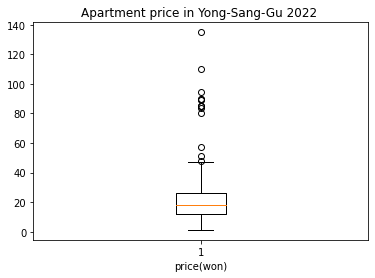

In [212]:
# 거래금액 
plt.boxplot(record_2022['거래금액(억)'])
plt.title("Apartment price in Yong-Sang-Gu 2022 ")
plt.xlabel("price(won)")

용산구 아파트 매물의 중앙값은 18억이지만 몇 몇 아파트 매물들은 IQR 범위 바깥에 존재한다. 

## 데이터 시각화
1. 수치형 데이터 히트맵(건축년도, 전용면적, 층, 거래금액) correlation table 
2. 2022년도 월별 거래건수 
3. 2022년 용산구 법정동 별 거래 건수 비교 
4. 2022년 법정동 별 평균 거래 금액 비교

### 수치형 데이터 히트맵(건축년도, 전용면적, 층, 거래금액) correlation table 

In [ ]:
df_numeric = record_2022[["건축년도", "전용면적(평)","층", "거래금액(억)"]]

In [219]:
df_numeric.corr()

,건축년도,전용면적(평),층,거래금액(억)
건축년도,1.000000,0.131843,0.517257,0.236466
전용면적(평),0.131843,1.000000,0.002063,0.783037
층,0.517257,0.002063,1.000000,0.009771
거래금액(억),0.236466,0.783037,0.009771,1.000000


In [221]:
plt.rcParams['font.family'] = 'AppleGothic'

In [225]:
plt.rcParams['font.size'] = 10

<AxesSubplot:>

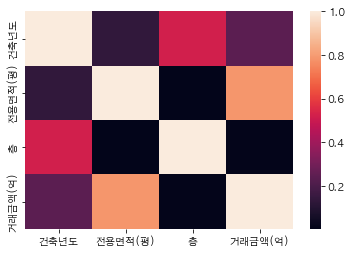

In [226]:
sns.heatmap(df_numeric.corr())

### 2022년도 월별 거래건수 


In [235]:
list_month = record_2022["월"]

In [236]:
new_list = {}
for i in list_month :
    try: new_list[i] += 1
    except : new_list[i] = 1


In [237]:
new_list

{1: 14,
 2: 18,
 3: 32,
 4: 43,
 5: 51,
 6: 26,
 7: 16,
 8: 10,
 9: 12,
 10: 9,
 11: 15,
 12: 10}

Text(0.5, 0, 'Month')

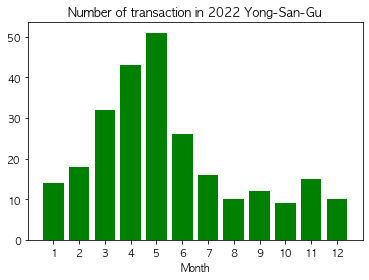

In [240]:
plt.bar(range(1,len(new_list)+1), list(new_list.values()), color='green')
plt.xticks(range(1,13))
plt.title("Number of transaction in 2022 Yong-San-Gu")
plt.xlabel("Month")

### 2022년 용산구 법정동 별 거래 건수 비교 

In [259]:
apt = record_2022["법정동"]

In [260]:
apt.unique()

array(['원효로1가', '문배동', '한강로3가', '이촌동', '이태원동', '한남동', '후암동', '청파동3가',
       '도원동', '한강로2가', '용산동5가', '용문동', '신계동', '서빙고동', '동자동', '산천동',
       '한강로1가', '보광동', '청암동', '원효로4가', '효창동', '용산동2가'], dtype=object)

In [261]:
apt.nunique

<bound method IndexOpsMixin.nunique of 0      원효로1가
1        문배동
2      한강로3가
3        이촌동
4        이촌동
       ...  
251    한강로2가
252      이촌동
253      이촌동
254      한남동
255      보광동
Name: 법정동, Length: 256, dtype: object>

In [275]:
apt.value_counts()

이촌동      71
한남동      40
문배동      24
한강로3가    21
이태원동     15
후암동      11
한강로2가    11
도원동      10
원효로4가     8
한강로1가     7
원효로1가     5
효창동       5
신계동       5
보광동       5
동자동       5
용문동       2
산천동       2
서빙고동      2
용산동5가     2
청파동3가     2
용산동2가     2
청암동       1
Name: 법정동, dtype: int64

In [267]:
apt_normalize = apt.value_counts()

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

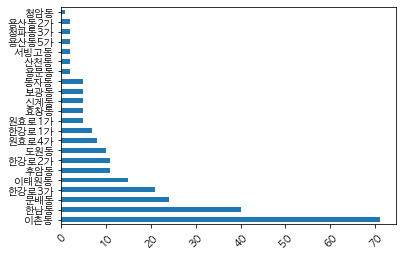

In [271]:
apt_normalize.plot.barh()

### 2022년 법정동 별 평균 거래 금액 비교

In [292]:
dong_price_list = record_2022[["법정동","거래금액(억)"]]

In [298]:
dong_price_list

,법정동,거래금액(억)
0,원효로1가,12.0
1,문배동,1.55
2,한강로3가,24.9
3,이촌동,21.0
4,이촌동,50.9998
...,...,...
251,한강로2가,35.0
252,이촌동,21.0
253,이촌동,21.5
254,한남동,16.9


In [323]:
grouped_df = dong_price_list.groupby(["법정동"]).mean()

<AxesSubplot:ylabel='법정동'>

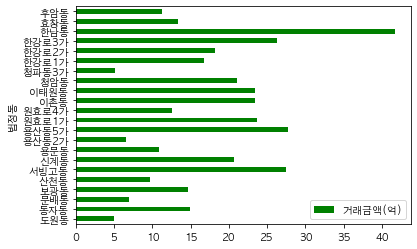

In [327]:
grouped_df.plot.barh(color='green')